### importando librerias


In [8]:
import cv2
import numpy as np

### funcion para pasar escala de grises  ponderada la imagen 

In [9]:

def escalaGrisPonderado(img):
    """Convierte una imagen a escala de grises utilizando la ponderación estándar."""
    gris = np.zeros_like(img, dtype=np.uint8)[:, :, 0]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            gris[i, j] = int(0.299*pixel[0] + 0.587*pixel[1] + 0.11*pixel[2])
    return gris

### funcion para binarizar la imagen ya sea si va en escala de grises o a color

In [10]:
#se uso el metodo otsu fijo ya que el busca el mejor umbral
def binarizar_imagen(imagen):
    
    #aqui si la imgen no viene en escala de grises la combierte
    if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
   
    umbral, img_bin = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return img_bin

### probando las funciones

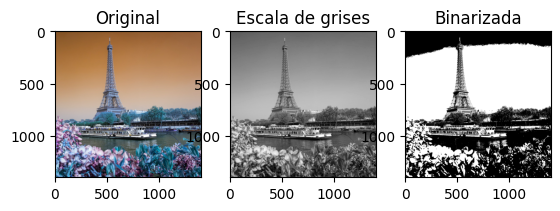

In [11]:
img = cv2.imread("paris.jpg")
img_gris = escalaGrisPonderado(img)
#aca le mando de una vez en escala de griss, pero puedo mandarla a color e igual funciona el metodo
img_bin = binarizar_imagen(img_gris)

#imprimimoslas imagenes en una matriz de 1 filay 3 columnas.
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(img_gris, cmap='gray')
plt.title('Escala de grises')

plt.subplot(1, 3, 3)
plt.imshow(img_bin, cmap='gray')
plt.title('Binarizada')

plt.show()
